# Plot experiment results

In [1]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


## Specify data

### Runs

In [2]:
runs = OrderedDict()

runs["truth"] = ["truth_20200930_092023_1000"]
runs["mle"] = ["mle_20200930_092023_1001"]
runs["random"] = [
    "random_20200930_092429_1060",
    "random_20200930_092430_1061",
    "random_20200930_092430_1062",
    "random_20200930_092430_1063",
    "random_20200930_092430_1064",
]
runs["greedy"] = ["greedy_20200930_092023_1003"]

runs["beamsearch_s"] = ["beamsearch_s_20200930_092023_1004"]
runs["beamsearch_m"] = ["beamsearch_m_20200930_092023_1005"]
runs["beamsearch_l"] = ["beamsearch_l_20200930_092023_1006"]
runs["beamsearch_xl"] = ["beamsearch_xl_20200930_092023_1007"]


In [3]:
runs["mcts_xs"] = [
    "mcts_nn_xs_20200930_092038_1000",
    "mcts_nn_xs_20200930_092038_1001",
    "mcts_nn_xs_20200930_092038_1002",
    "mcts_nn_xs_20200930_092038_1003",
    "mcts_nn_xs_20200930_092039_1004",
]
runs["mcts_s"] = [
    "mcts_nn_s_20200930_092039_1005",
    "mcts_nn_s_20200930_092039_1006",
    "mcts_nn_s_20200930_092039_1007",
    "mcts_nn_s_20200930_092039_1008",
    "mcts_nn_s_20200930_092039_1009",
]
runs["mcts_m"] = [
    "mcts_nn_m_20200930_092039_1010",
    "mcts_nn_m_20200930_092039_1011",
    "mcts_nn_m_20200930_092039_1012",
    "mcts_nn_m_20200930_092039_1013",
    "mcts_nn_m_20200930_092039_1014",
]
runs["mcts_l"] = [
    "mcts_nn_l_20200930_092039_1015",
    "mcts_nn_l_20200930_092039_1019",
    "mcts_nn_l_20200930_092040_1016",
    "mcts_nn_l_20200930_092040_1017",
    "mcts_nn_l_20200930_092040_1018",
]


In [4]:
runs["lfd-mcts_xs"] = [
    "bla"
]
runs["lfd-mcts_s"] = [
    "lfd-mcts_s_20200930_092039_1025",
    "lfd-mcts_s_20200930_092039_1026",
    "lfd-mcts_s_20200930_092039_1027",
    "lfd-mcts_s_20200930_092039_1028",
    "lfd-mcts_s_20200930_092039_1029",
]
runs["lfd-mcts_m"] = [
    "bla"
]
runs["lfd-mcts_l"] = [
    "bla"
]

runs["lfd_s"] = [
    "lfd_s_20200930_092039_1020",
    "lfd_s_20200930_092039_1021",
    "lfd_s_20200930_092039_1022",
    "lfd_s_20200930_092039_1023",
    "lfd_s_20200930_092039_1024",
]


In [5]:
runs["mcts_raw"] = [
    "mcts_raw_s_20200930_092053_1040",
    "mcts_raw_s_20200930_092113_1041",
    "mcts_raw_s_20200930_092225_1042",
    "mcts_raw_s_20200930_092225_1043",
    "mcts_raw_s_20200930_092244_1044",
]
runs["mcts_explore"] = [
    "mcts_s_explore_20200930_092044_1035",
    "mcts_s_explore_20200930_092539_1036",
    "mcts_s_explore_20200930_092540_1037",
    "mcts_s_explore_20200930_092540_1038",
    "mcts_s_explore_20200930_092540_1039",
]
runs["mcts_exploit"] = [
    "mcts_s_exploit_20200930_092039_1030",
    "mcts_s_exploit_20200930_092039_1031",
    "mcts_s_exploit_20200930_092039_1032",
    "mcts_s_exploit_20200930_092039_1033",
    "mcts_s_exploit_20200930_092039_1034",
]
runs["mcts_puctdecisions"] = [
    "mcts_puct_decisions_s_20200930_092243_1045",
    "mcts_puct_decisions_s_20200930_092243_1046",
    "mcts_puct_decisions_s_20200930_092244_1047",
    "mcts_puct_decisions_s_20200930_092324_1048",
    "mcts_puct_decisions_s_20200930_092324_1049",
]
runs["mcts_onlybs"] = ["mcts_only_bs_s_20200930_092023_1009"]
runs["mcts_nobs"] = [
    "mcts_nn_no_beamsearch_s_20200930_092324_1050",
    "mcts_nn_no_beamsearch_s_20200930_092324_1051",
    "mcts_nn_no_beamsearch_s_20200930_092324_1052",
    "mcts_nn_no_beamsearch_s_20200930_092324_1053",
    "mcts_nn_no_beamsearch_s_20200930_092324_1054",
]
runs["mcts_random"] = [
    "mcts_random_s_20200930_092324_1055",
    "mcts_random_s_20200930_092324_1056",
    "mcts_random_s_20200930_092324_1057",
    "mcts_random_s_20200930_092324_1058",
    "mcts_random_s_20200930_092324_1059",
]
runs["mcts_likelihood"] = ["mcts_likelihood_s_20200930_092023_1008"]


### Labels and style

In [6]:
labels = {}

labels["truth"] = "Truth"
labels["mle"] = "MLE"
labels["random"] = "Random"
labels["greedy"] = "Greedy"

labels["beamsearch_s"] = "Beam search"
labels["beamsearch_m"] = "Beam search"
labels["beamsearch_l"] = "Beam search"
labels["beamsearch_xl"] = "Beam search"

labels["mcts_xs"] = "MCTS"
labels["mcts_s"] = "MCTS"
labels["mcts_m"] = "MCTS"
labels["mcts_l"] = "MCTS"

labels["lfd_s"] = "LfD"

labels["lfd-mcts_xs"] = "LfD-MCTS"
labels["lfd-mcts_s"] = "LfD-MCTS"
labels["lfd-mcts_m"] = "LfD-MCTS"
labels["lfd-mcts_l"] = "LfD-MCTS"


In [7]:
colors = {}

# https://coolors.co/053e61-337299-cc5c33-ed845e-f5a689-000000

colors["random"] = "black"
colors["truth"] = "black"
colors["mle"] = "black"
colors["greedy"] =  "#053E61"
colors["beamsearch_s"] = "#337299" 
colors["mcts_xs"] = "#CC5C33"
colors["lfd-mcts_xs"] = "#ED845E"
colors["lfd_s"] = "#F5A689"

colors["beamsearch_m"] = colors["beamsearch_s"]
colors["beamsearch_l"] = colors["beamsearch_s"]
colors["beamsearch_xl"] = colors["beamsearch_s"]
colors["mcts_s"] = colors["mcts_xs"]
colors["mcts_m"] = colors["mcts_xs"]
colors["mcts_l"] = colors["mcts_xs"]
colors["lfd-mcts_s"] = colors["lfd-mcts_xs"]
colors["lfd-mcts_m"] = colors["lfd-mcts_xs"]
colors["lfd-mcts_l"] = colors["lfd-mcts_xs"]


In [25]:
linestyles = {}

linestyles["truth"] = "-."
linestyles["mle"] = ":"
linestyles["random"] = ":"

linestyles["greedy"] = "--"

linestyles["beamsearch_s"] = "-."
linestyles["beamsearch_m"] = "-."
linestyles["beamsearch_l"] = "-."
linestyles["beamsearch_xl"] = "-."

linestyles["mcts_xs"] = "-"
linestyles["mcts_s"] = "-"
linestyles["mcts_m"] = "-"
linestyles["mcts_l"] = "-"

linestyles["lfd-mcts_xs"] = "--"
linestyles["lfd-mcts_s"] = "--"
linestyles["lfd-mcts_m"] = "--"
linestyles["lfd-mcts_l"] = "--"

linestyles["lfd_s"] = "-."


In [9]:
markers = {}

markers["beamsearch_s"] = "v"
markers["greedy"] = "^"
markers["mcts_xs"] = "o"
markers["lfd_s"] = "s"
markers["lfd-mcts_xs"] = "D"


## Load results

In [10]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}
costs = {}

for key, run_list in runs.items():
    log_likelihoods[key] = []
    costs[key] = []
    
    for run in run_list:
        try:
            jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
        except Exception as e:
            pass
            # print(e)
        
        try:
            log_likelihoods[key].append(
                np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
            )
        except Exception as e:
            # print(e)
            log_likelihoods[key].append(np.nan * np.ones(n_jets))

        try:
            costs[key].append(
                np.load(f"{run_dir}/{run}/eval_likelihood_evaluations.npy").flatten()
            )
        except Exception as e:
            # print(e)
            costs[key].append(np.nan * np.ones(n_jets))


## Process results

### Normalize wrt baseline

In [11]:
norm_key = "greedy"
rel_log_likelihoods = {}
norm_log_likelihoods = np.mean(log_likelihoods[norm_key], axis=0)

for key, vals in log_likelihoods.items():
    rel_log_likelihoods[key] = [val - norm_log_likelihoods for val in vals]


### Compute means and standard deviations

In [12]:
def compute_means_stds(inputs):
    means = {key: np.nanmean(val, axis=0) for key, val in inputs.items()}
    stds = {key: np.nanstd(val, axis=0) for key, val in inputs.items()}
    return means, stds


log_likelihood_means, log_likelihood_stds = compute_means_stds(log_likelihoods)
rel_log_likelihood_means, rel_log_likelihood_stds = compute_means_stds(rel_log_likelihoods)
cost_means, cost_stds = compute_means_stds(costs)
cost_stds = {}


/Users/johannbrehmer/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/johannbrehmer/anaconda3/envs/rl/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


### Bin results in number of jets

In [13]:
# n_bins = 5
# bin_boundaries = np.percentile(jet_sizes, np.linspace(0., 100., n_bins + 1)).astype(np.float)
# bin_boundaries[0] -= 0.01
# bin_boundaries[-1] += 0.01
bin_boundaries = [1.5] + list(np.arange(7.5, 17, 2)) + [20.5]


In [14]:
bin_jet_size = {}
bin_log_likelihood = {}
bin_log_likelihood_err = {}

for key in runs.keys():
    bin_jet_size_ = []
    bin_log_likelihood_ = []
    bin_log_likelihood_err_ = []
    
    for bin_min, bin_max in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        x = jet_sizes[(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        y = rel_log_likelihood_means[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        dy = rel_log_likelihood_stds[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        
        bin_jet_size_.append(np.mean(x))
        bin_log_likelihood_.append(np.mean(y))
        # bin_log_likelihood_err_.append(np.std(y) / (len(x)**0.5 + 1.e-9))
        bin_log_likelihood_err_.append(np.mean(dy))
        
    bin_jet_size[key] = np.asarray(bin_jet_size_)
    bin_log_likelihood[key] = np.asarray(bin_log_likelihood_)
    bin_log_likelihood_err[key] = np.asarray(bin_log_likelihood_err_)


## Plots

### Performance vs cost

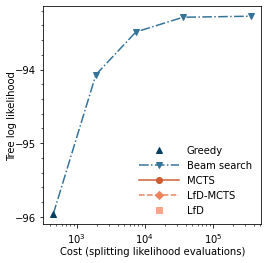

In [26]:
plot = [
    ["greedy"],
    ["beamsearch_s", "beamsearch_m", "beamsearch_l", "beamsearch_xl"],
    ["mcts_xs", "mcts_s", "mcts_m", "mcts_l"],
    ["lfd-mcts_xs", "lfd-mcts_s", "lfd-mcts_m", "lfd-mcts_l"],
    ["lfd_s"],
]

fig = plt.figure(figsize=(3.6,3.6))
ax = plt.gca()
    
for keys in plot:
    xs = np.asarray([np.mean(cost_means[key]) for key in keys])
    ys = np.asarray([np.mean(log_likelihood_means[key]) for key in keys])
    dys = np.asarray([np.mean(log_likelihood_stds[key]) for key in keys])
    c, m, ms, lbl = colors[keys[0]], markers[keys[0]], 6., labels[keys[0]]
    ls =  linestyles[keys[0]] if len(xs) > 1 else " "
    
    # Include greedy in beam search
    if keys[0] == "beamsearch_s":
        x0 = np.mean(cost_means["greedy"])
        y0 = np.mean(log_likelihood_means["greedy"])
        plt.plot(
            [x0, xs[0]], [y0, ys[0]],
            c=c, lw=1.5, ls=ls, zorder=-1
        )

    # Uncertainty bands
    if len(xs) > 1 and np.max(dys) > 1.e-3:
        plt.fill_between(xs, ys - dys, ys + dys, color=c, alpha=0.1)
    elif len(xs) == 1 and np.max(dys) > 1.e-3:
        plt.fill_between([xs[0] / 2.0, xs[0] * 2.0], list(ys - dys)*2, list(ys + dys)*2, color=c, alpha=0.1)
        
    plt.plot(xs, ys, c=c, lw=1.5, ls=ls, marker=m, markersize=ms, label=lbl)

plt.legend(loc="lower right", frameon=False, handlelength=4)

plt.xscale("log")
ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlabel("Cost (splitting likelihood evaluations)")
plt.ylabel(f"Tree log likelihood", labelpad=0)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.12, 0.5)

plt.subplots_adjust(left=0.15, bottom=0.15, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_cost.pdf")


### Performance vs # leaves

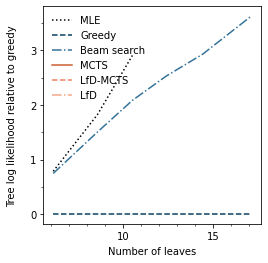

In [27]:
plot = ["mle", "greedy", "beamsearch_xl", "mcts_l", "lfd-mcts_s", "lfd_s"]

fig = plt.figure(figsize=(3.6,3.6))
ax = plt.gca()
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl = colors[key], linestyles[key], labels[key]
    
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
plt.xlabel("Number of leaves")
plt.ylabel(f"Tree log likelihood relative to {norm_key}")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.12, 0.5)

plt.subplots_adjust(left=0.15, bottom=0.15, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves.pdf")


## Print results

In [17]:
for key in runs.keys():
    mean = np.mean(log_likelihood_means[key])
    err = np.mean(log_likelihood_stds[key])
    cost = np.mean(cost_means[key])
    print(
        f"{key:>20.20}: ${mean:6.1f}"
        + f" \\textcolor{{dark-grey}}{{\pm {err:4.1f}}}$"
        + f" & {cost:6.0f}"
    )
          

               truth: $ -99.3 \textcolor{dark-grey}{\pm  0.0}$ &      0
                 mle: $   nan \textcolor{dark-grey}{\pm  nan}$ &      0
              random: $-198.3 \textcolor{dark-grey}{\pm 53.3}$ &      0
              greedy: $ -96.0 \textcolor{dark-grey}{\pm  0.0}$ &    452
        beamsearch_s: $ -94.1 \textcolor{dark-grey}{\pm  0.0}$ &   1914
        beamsearch_m: $ -93.5 \textcolor{dark-grey}{\pm  0.0}$ &   7397
        beamsearch_l: $ -93.3 \textcolor{dark-grey}{\pm  0.0}$ &  36641
       beamsearch_xl: $ -93.3 \textcolor{dark-grey}{\pm  0.0}$ & 365634
             mcts_xs: $   nan \textcolor{dark-grey}{\pm  nan}$ &    nan
              mcts_s: $   nan \textcolor{dark-grey}{\pm  nan}$ &    nan
              mcts_m: $   nan \textcolor{dark-grey}{\pm  nan}$ &    nan
              mcts_l: $   nan \textcolor{dark-grey}{\pm  nan}$ &    nan
         lfd-mcts_xs: $   nan \textcolor{dark-grey}{\pm  nan}$ &    nan
          lfd-mcts_s: $   nan \textcolor{dark-grey}{\pm  nan}$ &